<a href="https://colab.research.google.com/github/MansiSinghP/MACHINE-LEARNING-PROJECTS/blob/main/MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#loading the dataset
dataset=pd.read_csv('https://raw.githubusercontent.com/cerndb/dist-keras/master/examples/data/mnist.csv')
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
dataset.shape

(42000, 785)

In [114]:
dataset = dataset.iloc[40000:,]

In [115]:
#dropping columns
dataset.drop(dataset.iloc[:, 3:786], inplace=True, axis=1)

In [116]:
dataset.shape

(2000, 3)

In [117]:
dataset.head()

,label,pixel0,pixel1
40000,2,0,0
40001,3,0,0
40002,9,0,0
40003,7,0,0
40004,8,0,0


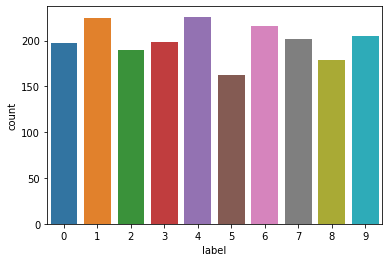

In [98]:
sns.countplot(x='label',data=dataset)

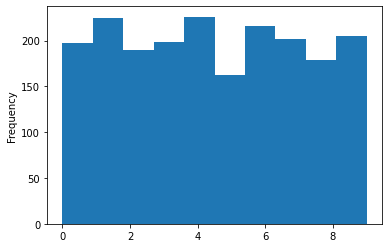

In [99]:
dataset['label'].plot.hist()

In [126]:
# there are no missing values in the dataset 

dataset.isnull().sum().head(10)


label     0
pixel0    0
pixel1    0
dtype: int64

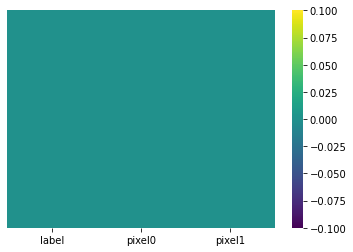

In [100]:
#heatmap to check null values in the dataset
sns.heatmap(dataset.isnull(),yticklabels=False,cmap='viridis')

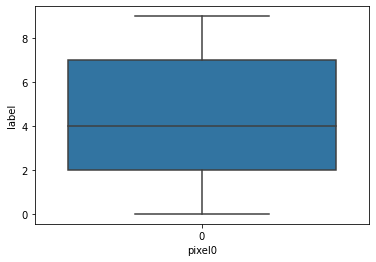

In [105]:
#boxplot
sns.boxplot(x='pixel0',y='label',data=dataset)

1.SVM classifier

Linear SVM classifier

In [118]:
X = dataset.drop('label', axis=1)
y = dataset['label']

In [119]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

In [127]:
X_test.describe()

,pixel0,pixel1
count,1000.0,1000.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [128]:
X_train.describe()

,pixel0,pixel1
count,1000.0,1000.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [120]:
#Training the algorithm
for i in range (1,100,1):
  from sklearn.svm import SVC
  svclassifier = SVC(kernel='linear',C=i)
  svclassifier.fit(X_train, y_train)

In [121]:
#making predictions
y_pred = svclassifier.predict(X_test)

In [122]:
#Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[  0  97   0   0   0   0   0   0   0   0]
 [  0 115   0   0   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0   0   0   0]
 [  0  95   0   0   0   0   0   0   0   0]
 [  0 118   0   0   0   0   0   0   0   0]
 [  0  78   0   0   0   0   0   0   0   0]
 [  0 114   0   0   0   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  0  80   0   0   0   0   0   0   0   0]
 [  0 103   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.12      1.00      0.21       115
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        95
           4       0.00      0.00      0.00       118
           5       0.00      0.00      0.00        78
           6       0.00      0.00      0.00       114
           7       0.00      0.00      0.00       102
           8       0.00      0.00      0.00        80
           9       0.00     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


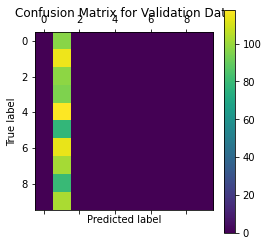

In [135]:
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix(y_test,y_pred))
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Polynomial Kernel SVM classifier

In [137]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Making Predictions

In [138]:
y_pred = svclassifier.predict(X_test)

Evaluating the algorithm

In [139]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0  97   0   0   0   0   0   0   0   0]
 [  0 115   0   0   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0   0   0   0]
 [  0  95   0   0   0   0   0   0   0   0]
 [  0 118   0   0   0   0   0   0   0   0]
 [  0  78   0   0   0   0   0   0   0   0]
 [  0 114   0   0   0   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  0  80   0   0   0   0   0   0   0   0]
 [  0 103   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.12      1.00      0.21       115
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        95
           4       0.00      0.00      0.00       118
           5       0.00      0.00      0.00        78
           6       0.00      0.00      0.00       114
           7       0.00      0.00      0.00       102
           8       0.00      0.00      0.00        80
           9       0.00     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest

In [58]:
#training the algorithm
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [59]:
#Evaluating the algorithm
# Check accuracy score 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[  0   0   0   0 102   0   0   0   0   0]
 [  0   0   0   0 111   0   0   0   0   0]
 [  0   0   0   0 105   0   0   0   0   0]
 [  0   0   0   0  96   0   0   0   0   0]
 [  0   0   0   0 107   0   0   0   0   0]
 [  0   0   0   0  79   0   0   0   0   0]
 [  0   0   0   0 105   0   0   0   0   0]
 [  0   0   0   0 102   0   0   0   0   0]
 [  0   0   0   0  91   0   0   0   0   0]
 [  0   0   0   0 102   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.00      0.00      0.00       111
           2       0.00      0.00      0.00       105
           3       0.00      0.00      0.00        96
           4       0.11      1.00      0.19       107
           5       0.00      0.00      0.00        79
           6       0.00      0.00      0.00       105
           7       0.00      0.00      0.00       102
           8       0.00      0.00      0.00        91
           9       0.00     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. 1-vs-rest classifier